AttributeError: module 'mpl_toolkits' has no attribute 'basemap'

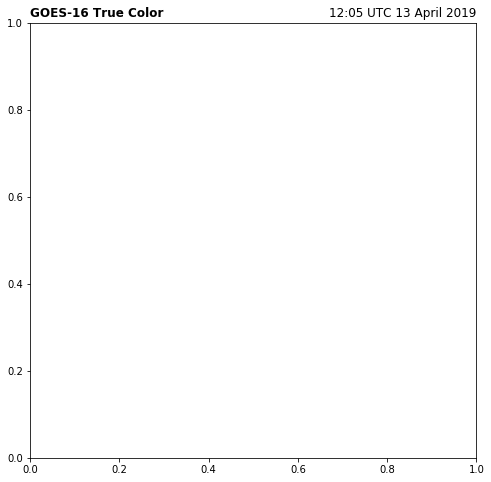

In [5]:
import sys
from netCDF4 import Dataset
from datetime import datetime, timedelta
import numpy as np
import matplotlib.pyplot as plt
import mpl_toolkits#.basemap import Basemap

# pyproj is used to regrid the data on a Basemap. 
try:
    from pyproj import Proj       
except:
    # Note to self: Since pyproj is not installed on meteo19, load it this way
    import sys
C_file = '/sharedData/scratch/OR_ABI-L1b-RadF-M6C08_G17_s20191031200341_e20191031209407_c20191031209451.nc'
C = Dataset(C_file, 'r')
# Seconds since 2000-01-01 12:00:00
add_seconds = float(C.variables['t'][0])#

# Datetime of image scan
DATE = datetime(2000, 1, 1, 12) + timedelta(seconds=add_seconds)

# Load the RGB arrays
R = C.variables['Rad'][:].data
G = C.variables['Rad'][:].data
B = C.variables['Rad'][:].data

# Turn empty values into nans
R[R==-1] = np.nan
G[G==-1] = np.nan
B[B==-1] = np.nan

# Apply range limits for each channel becuase RGB values must be between 0 and 1
R = np.maximum(R, 0)
R = np.minimum(R, 1)
G = np.maximum(G, 0)
G = np.minimum(G, 1)
B = np.maximum(B, 0)
B = np.minimum(B, 1)

# Apply the gamma correction
gamma = 0.4
R = np.power(R, gamma)
G = np.power(G, gamma)
B = np.power(B, gamma)

# Calculate the "True" Green
G_true = 0.48358168 * R + 0.45706946 * B + 0.06038137 * G
G_true = np.maximum(G_true, 0)
G_true = np.minimum(G_true, 1)

# The final RGB array :)
RGB = np.dstack([R, G_true, B])

plt.figure(figsize=[8, 8])
#plt.imshow(RGB)

plt.title('GOES-16 True Color', fontweight='semibold', loc='left', fontsize=12)
plt.title('%s' % DATE.strftime('%H:%M UTC %d %B %Y'), loc='right')

C.variables['goes_imager_projection']

# Satellite height
sat_h = C.variables['goes_imager_projection'].perspective_point_height

# Satellite longitude
sat_lon = C.variables['goes_imager_projection'].longitude_of_projection_origin

# Satellite sweep
sat_sweep = C.variables['goes_imager_projection'].sweep_angle_axis

# The projection x and y coordinates equals
# the scanning angle (in radians) multiplied by the satellite height (http://proj4.org/projections/geos.html)
X = C.variables['x'][:] * sat_h
Y = C.variables['y'][:] * sat_h

# The geostationary projection is perhaps the easiest way to plot the image on a map.
# Essentially, we are stretching the image across a map with the same projection and dimensions.
m = mpl_toolkits.basemap(projection='geos', lon_0=sat_lon,
            resolution='i', area_thresh=5000,
            llcrnrx=X.min(),llcrnry=Y.min(),
            urcrnrx=X.max(),urcrnry=Y.max(),
            ellps='GRS80')
            #rsphere=(6378137.00,6356752.3142))

#plt.figure(figsize=[15, 12])
m.imshow(np.flipud(RGB)) # Remember, "images" are upside down, so flip up/down
m.drawcoastlines()
m.drawcountries()
m.drawstates()

plt.title('GOES-17 True Color', fontweight='semibold', fontsize=15)
plt.title('%s' % DATE.strftime('%H:%M UTC %d %B %Y'), loc='right')

In [ ]:
import xarray as xr
ds = xr.open_dataset('OR_ABI-L1b-RadC-M6C01_G17_s20191771401196_e20191771403569_c20191771404008.nc')
ds['Rad'].plot()

In [8]:
ds.variables.keys()

KeysView(Frozen(OrderedDict([('Rad', <xarray.Variable (y: 3000, x: 5000)>
[15000000 values with dtype=float32]
Attributes:
    long_name:              ABI L1b Radiances
    standard_name:          toa_outgoing_radiance_per_unit_wavelength
    sensor_band_bit_depth:  10
    valid_range:            [   0 1022]
    units:                  W m-2 sr-1 um-1
    resolution:             y: 0.000028 rad x: 0.000028 rad
    grid_mapping:           goes_imager_projection
    cell_methods:           t: point area: point
    ancillary_variables:    DQF), ('DQF', <xarray.Variable (y: 3000, x: 5000)>
[15000000 values with dtype=float32]
Attributes:
    long_name:                                              ABI L1b Radiances...
    standard_name:                                          status_flag
    valid_range:                                            [0 4]
    units:                                                  1
    grid_mapping:                                           goes_imager_proje

In [9]:
import sys
from netCDF4 import Dataset
from mpl_toolkits.basemap import Basemap
C=Dataset('OR_ABI-L1b-RadC-M6C01_G17_s20191771401196_e20191771403569_c20191771404008.nc')

In [12]:
C.variables['Rad'][0]


masked_array(data=[5.0756454e-02, 5.0756454e-02, 5.0756454e-02, ...,
                   3.5250491e+02, 3.5412915e+02, 3.5331702e+02],
             mask=False,
       fill_value=1e+20,
            dtype=float32)

In [15]:
for key in C.variables.keys():
    print(key)
    print('----------------')
    print(C.variables[key])
    print(
    
    
    
    
    '')

Rad
----------------
<class 'netCDF4._netCDF4.Variable'>
int16 Rad(y, x)
    _FillValue: 1023
    long_name: ABI L1b Radiances
    standard_name: toa_outgoing_radiance_per_unit_wavelength
    _Unsigned: true
    sensor_band_bit_depth: 10
    valid_range: [   0 1022]
    scale_factor: 0.8121064
    add_offset: -25.936647
    units: W m-2 sr-1 um-1
    resolution: y: 0.000028 rad x: 0.000028 rad
    coordinates: band_id band_wavelength t y x
    grid_mapping: goes_imager_projection
    cell_methods: t: point area: point
    ancillary_variables: DQF
unlimited dimensions: 
current shape = (3000, 5000)
filling on

DQF
----------------
<class 'netCDF4._netCDF4.Variable'>
int8 DQF(y, x)
    _FillValue: -1
    long_name: ABI L1b Radiances data quality flags
    standard_name: status_flag
    _Unsigned: true
    valid_range: [0 4]
    units: 1
    coordinates: band_id band_wavelength t y x
    grid_mapping: goes_imager_projection
    cell_methods: t: point area: point
    flag_values: [0 1 2 3 

/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/ipykernel_launcher.py:82: MatplotlibDeprecationWarning: 
The dedent function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use inspect.cleandoc instead.
/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/ipykernel_launcher.py:89: MatplotlibDeprecationWarning: 
The dedent function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use inspect.cleandoc instead.
/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/ipykernel_launcher.py:90: MatplotlibDeprecationWarning: 
The dedent function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use inspect.cleandoc instead.


Text(1.0, 1.0, '14:02 UTC 26 June 2019')

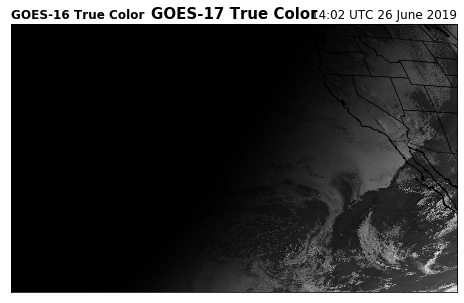

In [18]:
import sys
from netCDF4 import Dataset
from datetime import datetime, timedelta
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.basemap import Basemap

# pyproj is used to regrid the data on a Basemap. 
try:
    from pyproj import Proj       
except:
    # Note to self: Since pyproj is not installed on meteo19, load it this way
    import sys
C_file = 'OR_ABI-L1b-RadC-M6C01_G17_s20191771401196_e20191771403569_c20191771404008.nc'
C = Dataset(C_file, 'r')
# Seconds since 2000-01-01 12:00:00
add_seconds = float(C.variables['t'][0])#

# Datetime of image scan
DATE = datetime(2000, 1, 1, 12) + timedelta(seconds=add_seconds)

# Load the RGB arrays
R = C.variables['Rad'][:].data
G = C.variables['Rad'][:].data
B = C.variables['Rad'][:].data

# Turn empty values into nans
R[R==-1] = np.nan
G[G==-1] = np.nan
B[B==-1] = np.nan

# Apply range limits for each channel becuase RGB values must be between 0 and 1
R = np.maximum(R, 0)
R = np.minimum(R, 1)
G = np.maximum(G, 0)
G = np.minimum(G, 1)
B = np.maximum(B, 0)
B = np.minimum(B, 1)

# Apply the gamma correction
gamma = 0.4
R = np.power(R, gamma)
G = np.power(G, gamma)
B = np.power(B, gamma)

# Calculate the "True" Green
G_true = 0.48358168 * R + 0.45706946 * B + 0.06038137 * G
G_true = np.maximum(G_true, 0)
G_true = np.minimum(G_true, 1)

# The final RGB array :)
RGB = np.dstack([R, G_true, B])

plt.figure(figsize=[8, 8])
#plt.imshow(RGB)

plt.title('GOES-16 True Color', fontweight='semibold', loc='left', fontsize=12)
plt.title('%s' % DATE.strftime('%H:%M UTC %d %B %Y'), loc='right')

C.variables['goes_imager_projection']

# Satellite height
sat_h = C.variables['goes_imager_projection'].perspective_point_height

# Satellite longitude
sat_lon = C.variables['goes_imager_projection'].longitude_of_projection_origin

# Satellite sweep
sat_sweep = C.variables['goes_imager_projection'].sweep_angle_axis

# The projection x and y coordinates equals
# the scanning angle (in radians) multiplied by the satellite height (http://proj4.org/projections/geos.html)
X = C.variables['x'][:] * sat_h
Y = C.variables['y'][:] * sat_h

# The geostationary projection is perhaps the easiest way to plot the image on a map.
# Essentially, we are stretching the image across a map with the same projection and dimensions.
m = Basemap(projection='geos', lon_0=sat_lon,
            resolution='i', area_thresh=5000,
            llcrnrx=X.min(),llcrnry=Y.min(),
            urcrnrx=X.max(),urcrnry=Y.max(),
            ellps='GRS80')
            #rsphere=(6378137.00,6356752.3142))

#plt.figure(figsize=[15, 12])
radiance = C.variables['Rad'][:]
m.imshow(radiance, cmap='Greys_r') # Remember, "images" are upside down, so flip up/down
m.drawcoastlines()
m.drawcountries()
m.drawstates()

plt.title('GOES-17 True Color', fontweight='semibold', fontsize=15)
plt.title('%s' % DATE.strftime('%H:%M UTC %d %B %Y'), loc='right')

/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/ipykernel_launcher.py:82: MatplotlibDeprecationWarning: 
The dedent function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use inspect.cleandoc instead.
/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/ipykernel_launcher.py:89: MatplotlibDeprecationWarning: 
The dedent function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use inspect.cleandoc instead.
/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/ipykernel_launcher.py:90: MatplotlibDeprecationWarning: 
The dedent function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use inspect.cleandoc instead.


Text(1.0, 1.0, '14:02 UTC 26 June 2019')

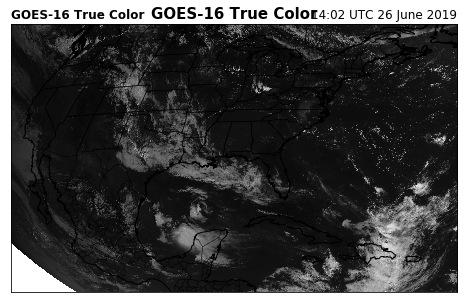

In [20]:
import sys
from netCDF4 import Dataset
from datetime import datetime, timedelta
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.basemap import Basemap

# pyproj is used to regrid the data on a Basemap. 
try:
    from pyproj import Proj       
except:
    # Note to self: Since pyproj is not installed on meteo19, load it this way
    import sys
C_file = 'OR_ABI-L1b-RadC-M6C01_G16_s20191771401199_e20191771403572_c20191771404018.nc'
C = Dataset(C_file, 'r')
# Seconds since 2000-01-01 12:00:00
add_seconds = float(C.variables['t'][0])#

# Datetime of image scan
DATE = datetime(2000, 1, 1, 12) + timedelta(seconds=add_seconds)

# Load the RGB arrays
R = C.variables['Rad'][:].data
G = C.variables['Rad'][:].data
B = C.variables['Rad'][:].data

# Turn empty values into nans
R[R==-1] = np.nan
G[G==-1] = np.nan
B[B==-1] = np.nan

# Apply range limits for each channel becuase RGB values must be between 0 and 1
R = np.maximum(R, 0)
R = np.minimum(R, 1)
G = np.maximum(G, 0)
G = np.minimum(G, 1)
B = np.maximum(B, 0)
B = np.minimum(B, 1)

# Apply the gamma correction
gamma = 0.4
R = np.power(R, gamma)
G = np.power(G, gamma)
B = np.power(B, gamma)

# Calculate the "True" Green
G_true = 0.48358168 * R + 0.45706946 * B + 0.06038137 * G
G_true = np.maximum(G_true, 0)
G_true = np.minimum(G_true, 1)

# The final RGB array :)
RGB = np.dstack([R, G_true, B])

plt.figure(figsize=[8, 8])
#plt.imshow(RGB)

plt.title('GOES-16 True Color', fontweight='semibold', loc='left', fontsize=12)
plt.title('%s' % DATE.strftime('%H:%M UTC %d %B %Y'), loc='right')

C.variables['goes_imager_projection']

# Satellite height
sat_h = C.variables['goes_imager_projection'].perspective_point_height

# Satellite longitude
sat_lon = C.variables['goes_imager_projection'].longitude_of_projection_origin

# Satellite sweep
sat_sweep = C.variables['goes_imager_projection'].sweep_angle_axis

# The projection x and y coordinates equals
# the scanning angle (in radians) multiplied by the satellite height (http://proj4.org/projections/geos.html)
X = C.variables['x'][:] * sat_h
Y = C.variables['y'][:] * sat_h

# The geostationary projection is perhaps the easiest way to plot the image on a map.
# Essentially, we are stretching the image across a map with the same projection and dimensions.
m = Basemap(projection='geos', lon_0=sat_lon,
            resolution='i', area_thresh=5000,
            llcrnrx=X.min(),llcrnry=Y.min(),
            urcrnrx=X.max(),urcrnry=Y.max(),
            ellps='GRS80')
            #rsphere=(6378137.00,6356752.3142))

#plt.figure(figsize=[15, 12])
radiance = C.variables['Rad'][:]
m.imshow(radiance, cmap='Greys_r') # Remember, "images" are upside down, so flip up/down
m.drawcoastlines()
m.drawcountries()
m.drawstates()

plt.title('GOES-16 True Color', fontweight='semibold', fontsize=15)
plt.title('%s' % DATE.strftime('%H:%M UTC %d %B %Y'), loc='right')

/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/ipykernel_launcher.py:82: MatplotlibDeprecationWarning: 
The dedent function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use inspect.cleandoc instead.
/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/ipykernel_launcher.py:89: MatplotlibDeprecationWarning: 
The dedent function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use inspect.cleandoc instead.
/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/ipykernel_launcher.py:90: MatplotlibDeprecationWarning: 
The dedent function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use inspect.cleandoc instead.


Text(1.0, 1.0, '14:02 UTC 26 June 2019')

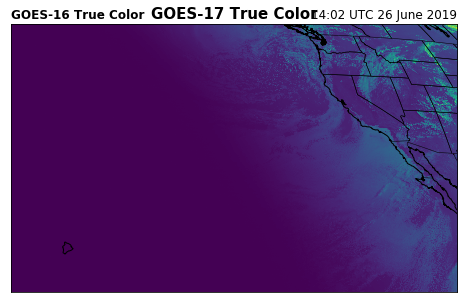

In [23]:
import sys
from netCDF4 import Dataset
from datetime import datetime, timedelta
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.basemap import Basemap

# pyproj is used to regrid the data on a Basemap. 
try:
    from pyproj import Proj       
except:
    # Note to self: Since pyproj is not installed on meteo19, load it this way
    import sys
C_file = 'OR_ABI-L1b-RadC-M6C01_G17_s20191771401196_e20191771403569_c20191771404008.nc'
C = Dataset(C_file, 'r')
# Seconds since 2000-01-01 12:00:00
add_seconds = float(C.variables['t'][0])#

# Datetime of image scan
DATE = datetime(2000, 1, 1, 12) + timedelta(seconds=add_seconds)

# Load the RGB arrays
R = C.variables['Rad'][:].data
G = C.variables['Rad'][:].data
B = C.variables['Rad'][:].data

# Turn empty values into nans
R[R==-1] = np.nan
G[G==-1] = np.nan
B[B==-1] = np.nan

# Apply range limits for each channel becuase RGB values must be between 0 and 1
R = np.maximum(R, 0)
R = np.minimum(R, 1)
G = np.maximum(G, 0)
G = np.minimum(G, 1)
B = np.maximum(B, 0)
B = np.minimum(B, 1)

# Apply the gamma correction
gamma = 0.4
R = np.power(R, gamma)
G = np.power(G, gamma)
B = np.power(B, gamma)

# Calculate the "True" Green
G_true = 0.48358168 * R + 0.45706946 * B + 0.06038137 * G
G_true = np.maximum(G_true, 0)
G_true = np.minimum(G_true, 1)

# The final RGB array :)
RGB = np.dstack([R, G_true, B])

plt.figure(figsize=[8, 8])
#plt.imshow(RGB)

plt.title('GOES-16 True Color', fontweight='semibold', loc='left', fontsize=12)
plt.title('%s' % DATE.strftime('%H:%M UTC %d %B %Y'), loc='right')

C.variables['goes_imager_projection']

# Satellite height
sat_h = C.variables['goes_imager_projection'].perspective_point_height

# Satellite longitude
sat_lon = C.variables['goes_imager_projection'].longitude_of_projection_origin

# Satellite sweep
sat_sweep = C.variables['goes_imager_projection'].sweep_angle_axis

# The projection x and y coordinates equals
# the scanning angle (in radians) multiplied by the satellite height (http://proj4.org/projections/geos.html)
X = C.variables['x'][:] * sat_h
Y = C.variables['y'][:] * sat_h

# The geostationary projection is perhaps the easiest way to plot the image on a map.
# Essentially, we are stretching the image across a map with the same projection and dimensions.
m = Basemap(projection='geos', lon_0=sat_lon,
            resolution='i', area_thresh=5000,
            llcrnrx=X.min(),llcrnry=Y.min(),
            urcrnrx=X.max(),urcrnry=Y.max(),
            ellps='GRS80')
            #rsphere=(6378137.00,6356752.3142))

#plt.figure(figsize=[15, 12])
radiance = C.variables['Rad'][:]
m.imshow(np.flipud(radiance)) # Remember, "images" are upside down, so flip up/down
m.drawcoastlines()
m.drawcountries()
m.drawstates()

plt.title('GOES-17 True Color', fontweight='semibold', fontsize=15)
plt.title('%s' % DATE.strftime('%H:%M UTC %d %B %Y'), loc='right')

/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/ipykernel_launcher.py:82: MatplotlibDeprecationWarning: 
The dedent function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use inspect.cleandoc instead.
/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/ipykernel_launcher.py:89: MatplotlibDeprecationWarning: 
The dedent function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use inspect.cleandoc instead.
/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/ipykernel_launcher.py:90: MatplotlibDeprecationWarning: 
The dedent function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use inspect.cleandoc instead.


Text(1.0, 1.0, '14:02 UTC 26 June 2019')

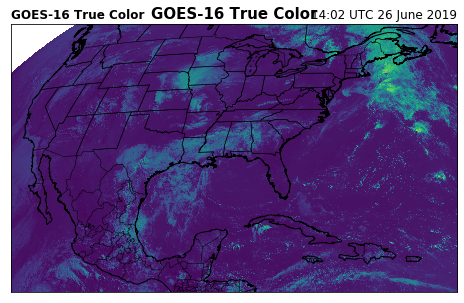

In [24]:
import sys
from netCDF4 import Dataset
from datetime import datetime, timedelta
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.basemap import Basemap

# pyproj is used to regrid the data on a Basemap. 
try:
    from pyproj import Proj       
except:
    # Note to self: Since pyproj is not installed on meteo19, load it this way
    import sys
C_file = 'OR_ABI-L1b-RadC-M6C01_G16_s20191771401199_e20191771403572_c20191771404018.nc'
C = Dataset(C_file, 'r')
# Seconds since 2000-01-01 12:00:00
add_seconds = float(C.variables['t'][0])#

# Datetime of image scan
DATE = datetime(2000, 1, 1, 12) + timedelta(seconds=add_seconds)

# Load the RGB arrays
R = C.variables['Rad'][:].data
G = C.variables['Rad'][:].data
B = C.variables['Rad'][:].data

# Turn empty values into nans
R[R==-1] = np.nan
G[G==-1] = np.nan
B[B==-1] = np.nan

# Apply range limits for each channel becuase RGB values must be between 0 and 1
R = np.maximum(R, 0)
R = np.minimum(R, 1)
G = np.maximum(G, 0)
G = np.minimum(G, 1)
B = np.maximum(B, 0)
B = np.minimum(B, 1)

# Apply the gamma correction
gamma = 0.4
R = np.power(R, gamma)
G = np.power(G, gamma)
B = np.power(B, gamma)

# Calculate the "True" Green
G_true = 0.48358168 * R + 0.45706946 * B + 0.06038137 * G
G_true = np.maximum(G_true, 0)
G_true = np.minimum(G_true, 1)

# The final RGB array :)
RGB = np.dstack([R, G_true, B])

plt.figure(figsize=[8, 8])
#plt.imshow(RGB)

plt.title('GOES-16 True Color', fontweight='semibold', loc='left', fontsize=12)
plt.title('%s' % DATE.strftime('%H:%M UTC %d %B %Y'), loc='right')

C.variables['goes_imager_projection']

# Satellite height
sat_h = C.variables['goes_imager_projection'].perspective_point_height

# Satellite longitude
sat_lon = C.variables['goes_imager_projection'].longitude_of_projection_origin

# Satellite sweep
sat_sweep = C.variables['goes_imager_projection'].sweep_angle_axis

# The projection x and y coordinates equals
# the scanning angle (in radians) multiplied by the satellite height (http://proj4.org/projections/geos.html)
X = C.variables['x'][:] * sat_h
Y = C.variables['y'][:] * sat_h

# The geostationary projection is perhaps the easiest way to plot the image on a map.
# Essentially, we are stretching the image across a map with the same projection and dimensions.
m = Basemap(projection='geos', lon_0=sat_lon,
            resolution='i', area_thresh=5000,
            llcrnrx=X.min(),llcrnry=Y.min(),
            urcrnrx=X.max(),urcrnry=Y.max(),
            ellps='GRS80')
            #rsphere=(6378137.00,6356752.3142))

#plt.figure(figsize=[15, 12])
radiance = C.variables['Rad'][:]
m.imshow(np.flipud(radiance)) # Remember, "images" are upside down, so flip up/down
m.drawcoastlines()
m.drawcountries()
m.drawstates()

plt.title('GOES-16 True Color', fontweight='semibold', fontsize=15)
plt.title('%s' % DATE.strftime('%H:%M UTC %d %B %Y'), loc='right')

ABI band 2 central wavelength is 0.6399999856948853 um
ABI band 3 central wavelength is 0.8700000047683716 um
ABI band 1 central wavelength is 0.4699999988079071 um


/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/ipykernel_launcher.py:87: MatplotlibDeprecationWarning: 
The dedent function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use inspect.cleandoc instead.
/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/ipykernel_launcher.py:93: MatplotlibDeprecationWarning: 
The dedent function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use inspect.cleandoc instead.
/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/ipykernel_launcher.py:94: MatplotlibDeprecationWarning: 
The dedent function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use inspect.cleandoc instead.


Text(1.0, 1.0, '17:02 UTC 26 June 2019')

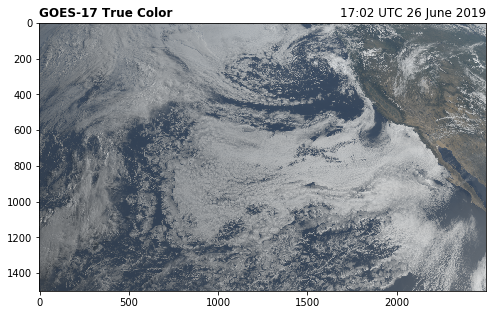

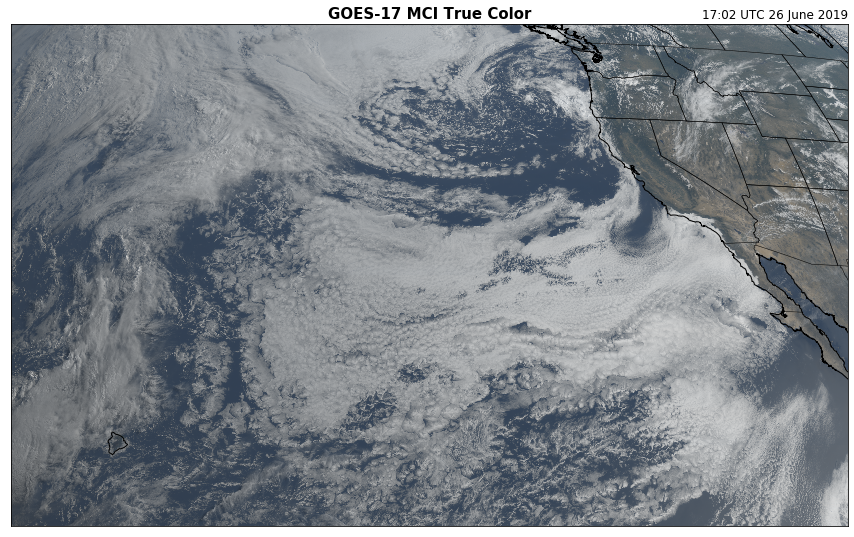

In [27]:
import sys
from netCDF4 import Dataset
from datetime import datetime, timedelta
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.basemap import Basemap

# pyproj is used to regrid the data on a Basemap. 
try:
    from pyproj import Proj       
except:
    # Note to self: Since pyproj is not installed on meteo19, load it this way
    import sys
C_file = 'OR_ABI-L2-MCMIPC-M6_G17_s20191771701197_e20191771703570_c20191771704070.nc'
C = Dataset(C_file, 'r')
# Seconds since 2000-01-01 12:00:00
add_seconds = float(C.variables['t'][0])#
#print(add_seconds.shape)
# Datetime of image scan
DATE = datetime(2000, 1, 1, 12) + timedelta(seconds=add_seconds)

for b in [2, 3, 1]:
    print ("{} is {} {}".format(C.variables['band_wavelength_C%02d' % b].long_name,
                           C.variables['band_wavelength_C%02d' % b][0],
                           C.variables['band_wavelength_C%02d' % b].units))

# Load the RGB arrays
R = C.variables['CMI_C02'][:].data
G = C.variables['CMI_C03'][:].data
B = C.variables['CMI_C01'][:].data

# Turn empty values into nans
R[R==-1] = np.nan
G[G==-1] = np.nan
B[B==-1] = np.nan

# Apply range limits for each channel becuase RGB values must be between 0 and 1
R = np.maximum(R, 0)
R = np.minimum(R, 1)
G = np.maximum(G, 0)
G = np.minimum(G, 1)
B = np.maximum(B, 0)
B = np.minimum(B, 1)

# Apply the gamma correction
gamma = 0.4
R = np.power(R, gamma)
G = np.power(G, gamma)
B = np.power(B, gamma)

# Calculate the "True" Green
G_true = 0.48358168 * R + 0.45706946 * B + 0.06038137 * G
G_true = np.maximum(G_true, 0)
G_true = np.minimum(G_true, 1)

# The final RGB array :)
RGB = np.dstack([R, G_true, B])

plt.figure(figsize=[8, 8])
plt.imshow(RGB)

plt.title('GOES-17 True Color', fontweight='semibold', loc='left', fontsize=12)
plt.title('%s' % DATE.strftime('%H:%M UTC %d %B %Y'), loc='right')

C.variables['goes_imager_projection']

# Satellite height
sat_h = C.variables['goes_imager_projection'].perspective_point_height

# Satellite longitude
sat_lon = C.variables['goes_imager_projection'].longitude_of_projection_origin

# Satellite sweep
sat_sweep = C.variables['goes_imager_projection'].sweep_angle_axis

# The projection x and y coordinates equals
# the scanning angle (in radians) multiplied by the satellite height (http://proj4.org/projections/geos.html)
X = C.variables['x'][:] * sat_h
Y = C.variables['y'][:] * sat_h

# The geostationary projection is perhaps the easiest way to plot the image on a map.
# Essentially, we are stretching the image across a map with the same projection and dimensions.
m = Basemap(projection='geos', lon_0=sat_lon,
            resolution='i', area_thresh=5000,
            llcrnrx=X.min(),llcrnry=Y.min(),
            urcrnrx=X.max(),urcrnry=Y.max(),
            ellps='GRS80')
            #rsphere=(6378137.00,6356752.3142))

plt.figure(figsize=[15, 12])
m.imshow(np.flipud(RGB)) # Remember, "images" are upside down, so flip up/down
m.drawcoastlines()
m.drawcountries()
m.drawstates()

plt.title('GOES-17 MCI True Color', fontweight='semibold', fontsize=15)
plt.title('%s' % DATE.strftime('%H:%M UTC %d %B %Y'), loc='right')

ABI band 2 central wavelength is 0.6399999856948853 um
ABI band 3 central wavelength is 0.8700000047683716 um
ABI band 1 central wavelength is 0.4699999988079071 um


/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/ipykernel_launcher.py:87: MatplotlibDeprecationWarning: 
The dedent function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use inspect.cleandoc instead.
/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/ipykernel_launcher.py:93: MatplotlibDeprecationWarning: 
The dedent function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use inspect.cleandoc instead.
/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/ipykernel_launcher.py:94: MatplotlibDeprecationWarning: 
The dedent function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use inspect.cleandoc instead.


Text(1.0, 1.0, '17:02 UTC 26 June 2019')

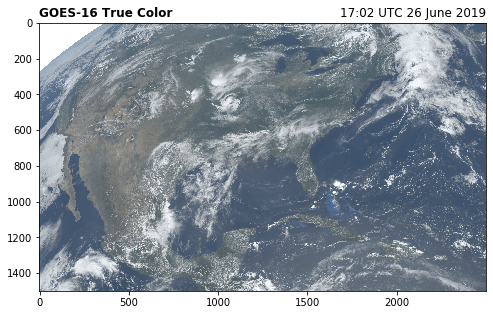

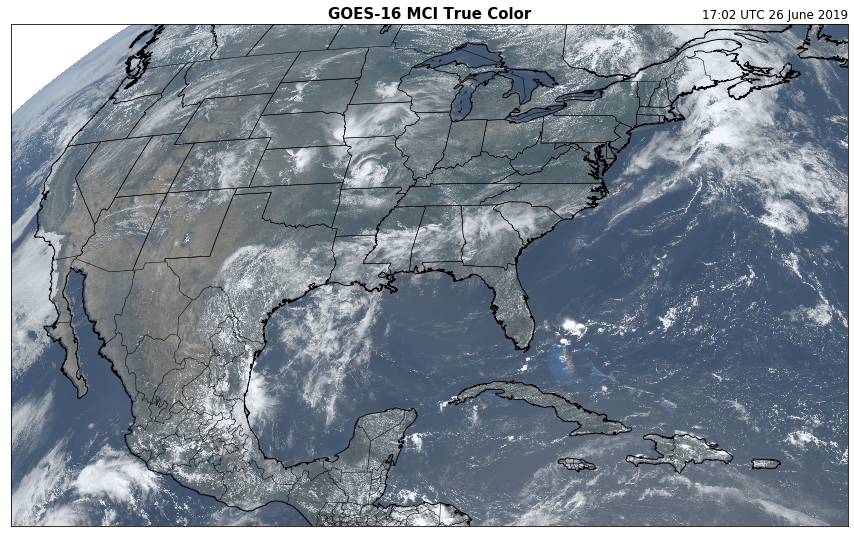

In [28]:
import sys
from netCDF4 import Dataset
from datetime import datetime, timedelta
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.basemap import Basemap

# pyproj is used to regrid the data on a Basemap. 
try:
    from pyproj import Proj       
except:
    # Note to self: Since pyproj is not installed on meteo19, load it this way
    import sys
C_file = 'OR_ABI-L2-MCMIPC-M6_G16_s20191771701200_e20191771703573_c20191771704096.nc'
C = Dataset(C_file, 'r')
# Seconds since 2000-01-01 12:00:00
add_seconds = float(C.variables['t'][0])#
#print(add_seconds.shape)
# Datetime of image scan
DATE = datetime(2000, 1, 1, 12) + timedelta(seconds=add_seconds)

for b in [2, 3, 1]:
    print ("{} is {} {}".format(C.variables['band_wavelength_C%02d' % b].long_name,
                           C.variables['band_wavelength_C%02d' % b][0],
                           C.variables['band_wavelength_C%02d' % b].units))

# Load the RGB arrays
R = C.variables['CMI_C02'][:].data
G = C.variables['CMI_C03'][:].data
B = C.variables['CMI_C01'][:].data

# Turn empty values into nans
R[R==-1] = np.nan
G[G==-1] = np.nan
B[B==-1] = np.nan

# Apply range limits for each channel becuase RGB values must be between 0 and 1
R = np.maximum(R, 0)
R = np.minimum(R, 1)
G = np.maximum(G, 0)
G = np.minimum(G, 1)
B = np.maximum(B, 0)
B = np.minimum(B, 1)

# Apply the gamma correction
gamma = 0.4
R = np.power(R, gamma)
G = np.power(G, gamma)
B = np.power(B, gamma)

# Calculate the "True" Green
G_true = 0.48358168 * R + 0.45706946 * B + 0.06038137 * G
G_true = np.maximum(G_true, 0)
G_true = np.minimum(G_true, 1)

# The final RGB array :)
RGB = np.dstack([R, G_true, B])

plt.figure(figsize=[8, 8])
plt.imshow(RGB)

plt.title('GOES-16 True Color', fontweight='semibold', loc='left', fontsize=12)
plt.title('%s' % DATE.strftime('%H:%M UTC %d %B %Y'), loc='right')

C.variables['goes_imager_projection']

# Satellite height
sat_h = C.variables['goes_imager_projection'].perspective_point_height

# Satellite longitude
sat_lon = C.variables['goes_imager_projection'].longitude_of_projection_origin

# Satellite sweep
sat_sweep = C.variables['goes_imager_projection'].sweep_angle_axis

# The projection x and y coordinates equals
# the scanning angle (in radians) multiplied by the satellite height (http://proj4.org/projections/geos.html)
X = C.variables['x'][:] * sat_h
Y = C.variables['y'][:] * sat_h

# The geostationary projection is perhaps the easiest way to plot the image on a map.
# Essentially, we are stretching the image across a map with the same projection and dimensions.
m = Basemap(projection='geos', lon_0=sat_lon,
            resolution='i', area_thresh=5000,
            llcrnrx=X.min(),llcrnry=Y.min(),
            urcrnrx=X.max(),urcrnry=Y.max(),
            ellps='GRS80')
            #rsphere=(6378137.00,6356752.3142))

plt.figure(figsize=[15, 12])
m.imshow(np.flipud(RGB)) # Remember, "images" are upside down, so flip up/down
m.drawcoastlines()
m.drawcountries()
m.drawstates()

plt.title('GOES-16 MCI True Color', fontweight='semibold', fontsize=15)
plt.title('%s' % DATE.strftime('%H:%M UTC %d %B %Y'), loc='right')

In [6]:
help(mpl_toolkits)

Help on package mpl_toolkits:

NAME
    mpl_toolkits

PACKAGE CONTENTS
    axes_grid (package)
    axes_grid1 (package)
    axisartist (package)
    mplot3d (package)

FILE
    (built-in)


